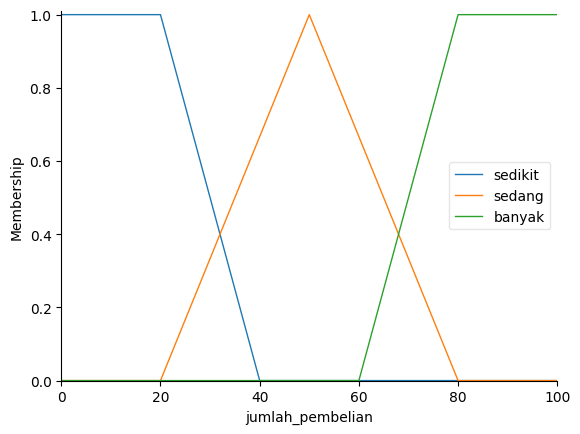

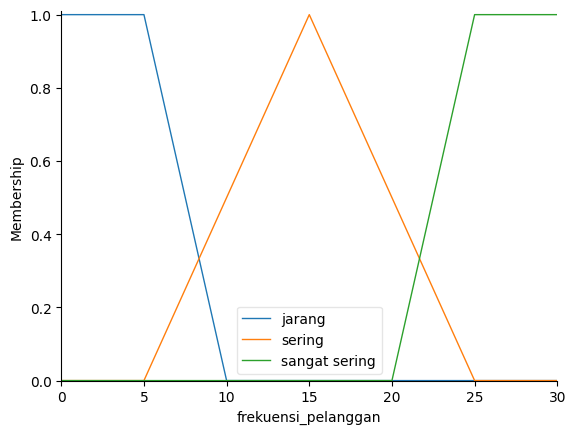

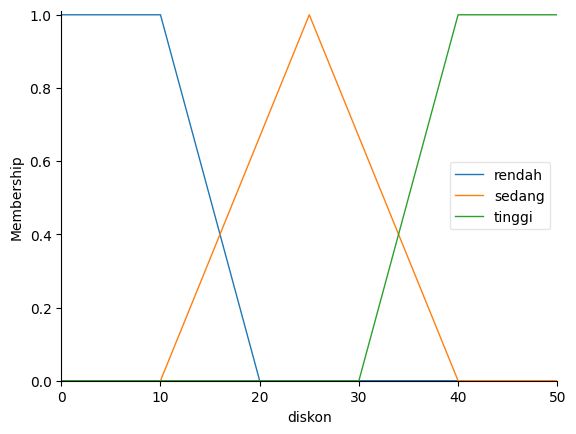

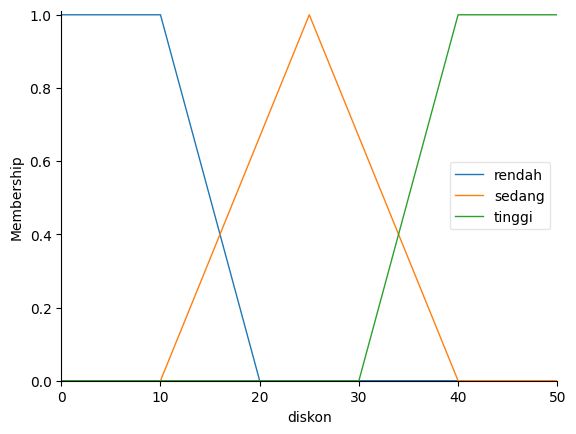

Tingkat diskon: 42.22


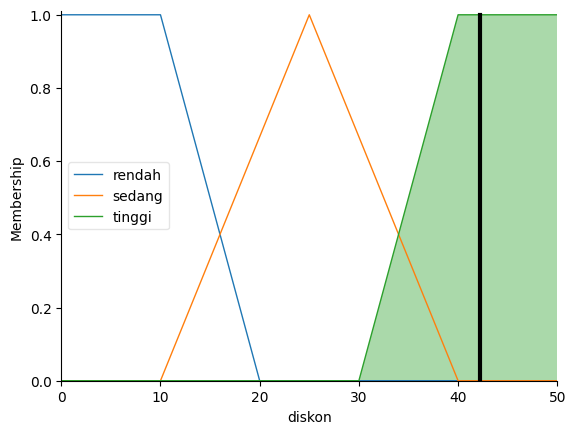

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# Membuat variabel fuzzy
jumlah_pembelian = ctrl.Antecedent(np.arange(0, 101, 1), 'jumlah_pembelian')
frekuensi_pelanggan = ctrl.Antecedent(np.arange(0, 31, 1), 'frekuensi_pelanggan')
diskon = ctrl.Consequent(np.arange(0, 51, 1), 'diskon')

# Membership function untuk jumlah pembelian
jumlah_pembelian['sedikit'] = fuzz.trapmf(jumlah_pembelian.universe, [0, 0, 20, 40])
jumlah_pembelian['sedang'] = fuzz.trimf(jumlah_pembelian.universe, [20, 50, 80])
jumlah_pembelian['banyak'] = fuzz.trapmf(jumlah_pembelian.universe, [60, 80, 100, 100])

# Membership function untuk frekuensi pelanggan
frekuensi_pelanggan['jarang'] = fuzz.trapmf(frekuensi_pelanggan.universe, [0, 0, 5, 10])
frekuensi_pelanggan['sering'] = fuzz.trimf(frekuensi_pelanggan.universe, [5, 15, 25])
frekuensi_pelanggan['sangat sering'] = fuzz.trapmf(frekuensi_pelanggan.universe, [20, 25, 30, 30])

# Membership function untuk diskon
diskon['rendah'] = fuzz.trapmf(diskon.universe, [0, 0, 10, 20])
diskon['sedang'] = fuzz.trimf(diskon.universe, [10, 25, 40])
diskon['tinggi'] = fuzz.trapmf(diskon.universe, [30, 40, 50, 50])

# Menentukan aturan fuzzy
rule1 = ctrl.Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['jarang'], diskon['rendah'])
rule2 = ctrl.Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['sering'], diskon['rendah'])
rule3 = ctrl.Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['sering'], diskon['sedang'])
rule4 = ctrl.Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['sangat sering'], diskon['tinggi'])
rule5 = ctrl.Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['sangat sering'], diskon['tinggi'])

# Membuat kontrol sistem fuzzy
diskon_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
diskon_simulasi = ctrl.ControlSystemSimulation(diskon_ctrl)

# Visualisasi membership function
jumlah_pembelian.view()
plt.show()

frekuensi_pelanggan.view()
plt.show()

diskon.view()
plt.show()

# Visualisasi hasil diskon setelah simulasi
diskon.view(sim=diskon_simulasi)
plt.show()


# input nilai pembelian dan frekuensi pelanggan
diskon_simulasi.input['jumlah_pembelian'] = 90
diskon_simulasi.input['frekuensi_pelanggan'] = 25

# Perhitungan
diskon_simulasi.compute()

# Hasil
print(f"Tingkat diskon: {diskon_simulasi.output['diskon']:.2f}")
diskon.view(sim=diskon_simulasi)

plt.show()
